In [55]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import probplot
from matplotlib import pyplot as plt

# Load and explore

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- **Id** - an Id that represents a (Store, Date) duple within the test set
- **Store** - a unique Id for each store
- **Sales** - the turnover for any given day (this is what you are predicting)
- **Customers** - the number of customers on a given day
- **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
- **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
- **StoreType** - differentiates between 4 different store models: a, b, c, d
- **Assortment** - describes an assortment level: a = basic, b = extra, c = extended
- **CompetitionDistance** - distance in meters to the nearest competitor store
- **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- **Promo** - indicates whether a store is running a promo on that day
- **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- **PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
!unzip -o '*.csv.zip'
!rm *.zip

In [15]:
ls

explore.ipynb  sample_submission.csv  store.csv  test.csv  train.csv


In [17]:
!head train.csv

"Store","DayOfWeek","Date","Sales","Customers","Open","Promo","StateHoliday","SchoolHoliday"
1,5,2015-07-31,5263,555,1,1,"0","1"
2,5,2015-07-31,6064,625,1,1,"0","1"
3,5,2015-07-31,8314,821,1,1,"0","1"
4,5,2015-07-31,13995,1498,1,1,"0","1"
5,5,2015-07-31,4822,559,1,1,"0","1"
6,5,2015-07-31,5651,589,1,1,"0","1"
7,5,2015-07-31,15344,1414,1,1,"0","1"
8,5,2015-07-31,8492,833,1,1,"0","1"
9,5,2015-07-31,8565,687,1,1,"0","1"


In [95]:
df = pd.read_csv('train.csv')
for c in df.columns:
    v = ["2015-07-31", 'etc.'] if c == 'Date' else np.sort(df[c].unique())
    hasna = df[c].isnull().any()
    print "{}: {}\n  has NA values: {}\n".format(c, v, hasna)

Store: [   1    2    3 ..., 1113 1114 1115]
  has NA values: False

DayOfWeek: [1 2 3 4 5 6 7]
  has NA values: False

Date: ['2015-07-31', 'etc.']
  has NA values: False

Sales: [    0    46   124 ..., 38484 38722 41551]
  has NA values: False

Customers: [   0    3    5 ..., 5458 5494 7388]
  has NA values: False

Open: [0 1]
  has NA values: False

Promo: [0 1]
  has NA values: False

StateHoliday: [0 '0' 'a' 'b' 'c']
  has NA values: False

SchoolHoliday: [0 1]
  has NA values: False



In [74]:
data_types = {
    "Store": int,
    "DayOfWeek": int,       # {1, 2, 3, 4, 5, 6, 7}
    "Date": object,         # e.g. "2015-07-31"
    "Sales": int,
    "Customers": int,
    "Open": bool,
    "Promo": bool,
    "StateHoliday": str,    # {'0', 'a', 'b', 'c'}
    "SchoolHoliday": bool,
}

df_train = pd.read_csv('train.csv', dtype=data_types)

In [82]:
!head test.csv

"Id","Store","DayOfWeek","Date","Open","Promo","StateHoliday","SchoolHoliday"
1,1,4,2015-09-17,1,1,"0","0"
2,3,4,2015-09-17,1,1,"0","0"
3,7,4,2015-09-17,1,1,"0","0"
4,8,4,2015-09-17,1,1,"0","0"
5,9,4,2015-09-17,1,1,"0","0"
6,10,4,2015-09-17,1,1,"0","0"
7,11,4,2015-09-17,1,1,"0","0"
8,12,4,2015-09-17,1,1,"0","0"
9,13,4,2015-09-17,1,1,"0","0"


In [93]:
df = pd.read_csv('test.csv')
for c in df.columns:
    v =  np.sort(df[c].unique())
    hasna = df[c].isnull().any()
    print "{}: {}\n  dtype: {}\n  has NA values: {}\n".format(c, v, df[c].dtype, hasna)

Id: [    1     2     3 ..., 41086 41087 41088]
  dtype: int64
  has NA values: False

Store: [   1    3    7    8    9   10   11   12   13   14   15   16   19   20   21
   22   23   24   25   27   29   30   31   32   33   35   36   38   39   40
   41   42   43   45   46   47   48   49   50   51   52   53   56   58   61
   62   63   64   66   67   68   69   70   71   72   73   74   75   76   77
   79   80   81   82   83   84   86   89   90   91   92   93   94   98   99
  100  101  102  105  107  108  109  110  111  112  113  115  117  118  119
  120  122  124  126  127  128  129  130  131  132  135  136  137  139  140
  141  142  143  144  145  146  147  149  150  152  153  154  155  157  158
  159  160  161  162  164  165  166  168  169  170  171  172  174  175  176
  179  180  181  182  183  184  186  187  188  189  190  191  192  193  194
  195  197  199  200  201  202  204  206  207  209  210  212  213  214  215
  216  217  218  219  220  221  224  226  227  228  229  230  231  233 

In [61]:
!head store.csv

"Store","StoreType","Assortment","CompetitionDistance","CompetitionOpenSinceMonth","CompetitionOpenSinceYear","Promo2","Promo2SinceWeek","Promo2SinceYear","PromoInterval"
1,"c","a",1270,9,2008,0,,,""
2,"a","a",570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
3,"a","a",14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
4,"c","c",620,9,2009,0,,,""
5,"a","a",29910,4,2015,0,,,""
6,"a","a",310,12,2013,0,,,""
7,"a","c",24000,4,2013,0,,,""
8,"a","a",7520,10,2014,0,,,""
9,"a","c",2030,8,2000,0,,,""


In [98]:
df = pd.read_csv('store.csv')
for c in df.columns:
    v = [20, 30, 'etc.', np.nan] if c == 'CompetitionDistance' else np.sort(df[c].unique())
    print "{}: {}\n  dtype: {}\n  has NA values: {}\n".format(c, v, df[c].dtype, df[c].isnull().any())

Store: [   1    2    3 ..., 1113 1114 1115]
  dtype: int64
  has NA values: False

StoreType: ['a' 'b' 'c' 'd']
  dtype: object
  has NA values: False

Assortment: ['a' 'b' 'c']
  dtype: object
  has NA values: False

CompetitionDistance: [20, 30, 'etc.', nan]
  dtype: float64
  has NA values: True

CompetitionOpenSinceMonth: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  nan]
  dtype: float64
  has NA values: True

CompetitionOpenSinceYear: [ 1900.  1961.  1990.  1994.  1995.  1998.  1999.  2000.  2001.  2002.
  2003.  2004.  2005.  2006.  2007.  2008.  2009.  2010.  2011.  2012.
  2013.  2014.  2015.    nan]
  dtype: float64
  has NA values: True

Promo2: [0 1]
  dtype: int64
  has NA values: False

Promo2SinceWeek: [  1.   5.   6.   9.  10.  13.  14.  18.  22.  23.  26.  27.  28.  31.  35.
  36.  37.  39.  40.  44.  45.  48.  49.  50.  nan]
  dtype: float64
  has NA values: True

Promo2SinceYear: [ 2009.  2010.  2011.  2012.  2013.  2014.  2015.    nan]
  dtype: float

In [120]:
# check consistency of 'Promo2' flag
for c in ('PromoInterval', 'Promo2SinceWeek', 'Promo2SinceYear'):
    print (df.Promo2[df[c].isnull()].unique(), df.Promo2[~df[c].isnull()].unique()) == ([0], [1])

True
True
True


In [121]:
# add analogous 'Competition' flag
print all(df['CompetitionDistance'].isnull() == df['CompetitionOpenSinceYear'].isnull())
print all(df['CompetitionDistance'].isnull() == df['CompetitionOpenSinceMonth'].isnull())
print all(df['CompetitionOpenSinceMonth'].isnull() == df['CompetitionOpenSinceYear'].isnull())

False
False
True


In [122]:
mask = df['CompetitionDistance'].isnull() != df['CompetitionOpenSinceYear'].isnull()
df[mask]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070,NaN,NaN,1,13,2010,"Jan,Apr,Jul,Oct"
12,13,d,a,310,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov"
15,16,a,c,3270,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240,NaN,NaN,1,22,2011,"Mar,Jun,Sept,Dec"
21,22,a,a,1040,NaN,NaN,1,22,2012,"Jan,Apr,Jul,Oct"
25,26,d,a,2300,NaN,NaN,0,NaN,NaN,NaN
28,29,d,c,2170,NaN,NaN,0,NaN,NaN,NaN
31,32,a,a,2910,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov"
39,40,a,a,180,NaN,NaN,1,45,2009,"Feb,May,Aug,Nov"
40,41,d,c,1180,NaN,NaN,1,31,2013,"Jan,Apr,Jul,Oct"


In [77]:
data_types = {
    "Store": int,
    "StoreType": str,
    "Assortment": str,
    "CompetitionDistance": float,
    "CompetitionOpenSinceMonth": float,
    "CompetitionOpenSinceYear": float,
    "Promo2": bool,
    "Promo2SinceWeek": float,
    "Promo2SinceYear": float,
    "PromoInterval": object,
}

df_store = pd.read_csv('store.csv', dtype=data_types)

# Explore target

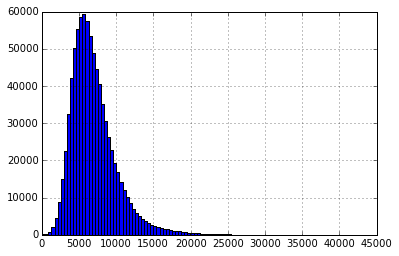

In [45]:
mask = df_train.Sales != 0

df_train[mask].Sales.hist(bins=100)

This looks like a log-normal distribution...

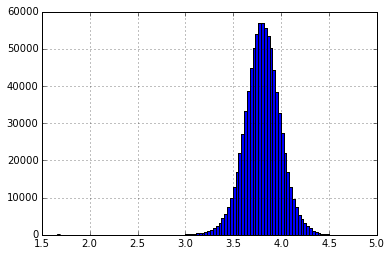

In [51]:
df_train[mask].Sales.map(np.log10).hist(bins=100)

Check QQ plot to see how well this is modeled by a Gaussian distribution:

((array([-4.79314476, -4.61214391, -4.51425117, ...,  4.51425117,
          4.61214391,  4.79314476]),
  array([ 1.66275783,  2.09342169,  2.12385164, ...,  4.58528021,
          4.58795778,  4.61858148])),
 (0.18438248551453371, 3.8033618126742885, 0.99829684200204238))

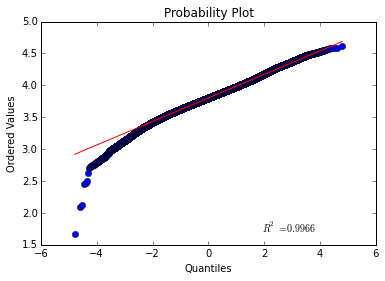

In [60]:
probplot(df_train[mask].Sales.map(np.log10), dist="norm", plot=plt)

# Explore features